# EDA ver5 :
- MLM활용하여 entity 추가

# **setting**

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle

#import os
#os.chdir('./data')
#os.getcwd()

**데이터 불러오기**

In [6]:
# 원본(32470 rows) + 증강 데이터(58446 rows) = 90916 rows
en_pd = pd.read_csv('/opt/ml/dataset/train/aug_entities.csv')

# 증강된 데이터 : 58446 rows
add_en =  en_pd[en_pd.source.isnull()]

In [8]:
add_en

# **EDA**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
def view_count(dataset,labels : str):
    # count 분포
    view = sns.countplot(data=dataset,x=labels,order = dataset[labels].value_counts().index)
    # label명 표시
    view.set_xticklabels(view.get_xticklabels(), rotation=90)

    # 각 막대에 숫자 표시
    for p in view.patches:
        height = p.get_height()
        view.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha = 'center', size = 6.5)

    plt.show()
    return 

### **01. 증강 데이터(add_en) 라벨 분포**

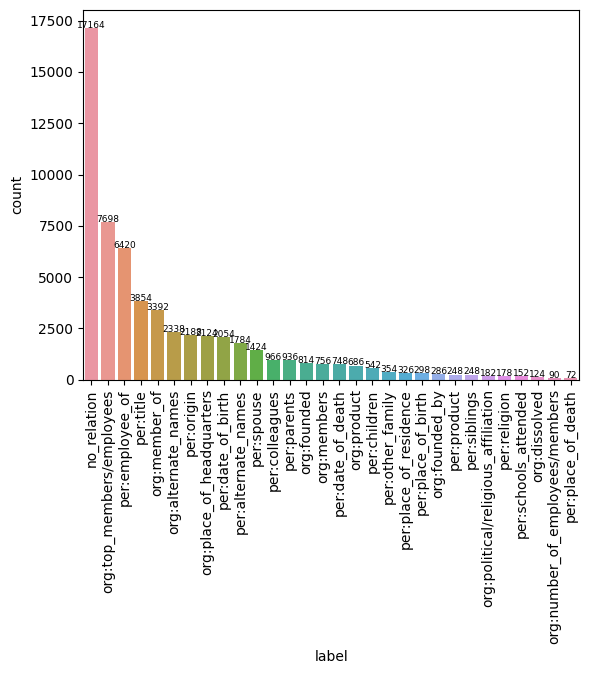

In [11]:
view_count(add_en,'label')
# 90916 rows

### **02. 증강+원본 데이터(en_pd) 라벨 분포**

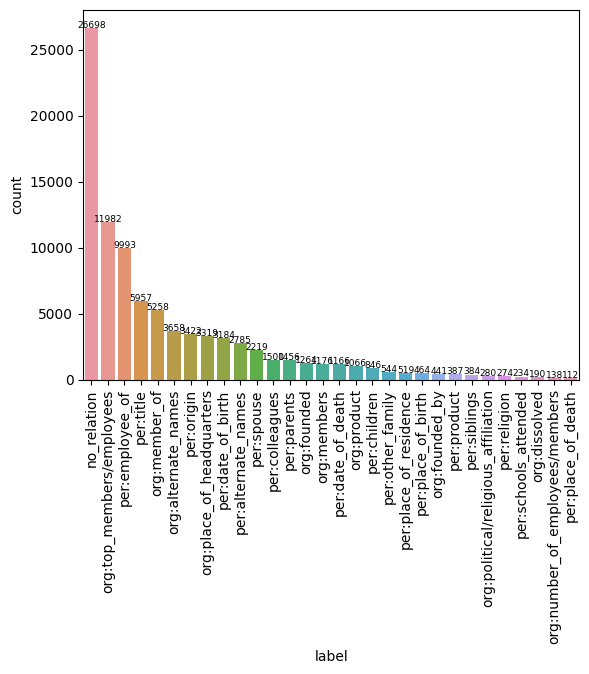

In [12]:
view_count(en_pd,'label')
# 32470 rows 

# **성능 테스트**
- model : klue/roberta-base
- batch_size: 16, max_epoch: 3, learning_rate: 1e-5

| model | test_auprc | test_f1 |
| --- | --- | --- |
| roberta/base | 72.465 | 82.546 |
| add_entity  | 88.669 | 88.768 |

# **결과**   
- 원본 데이터 결과보다 낮은 성능을 가짐.
- train/test 결과는 90.85(F1), 91.093(Auprc)였지만, inference.py 결과 큰 차이를 가짐.
- 증강 데이터가 train데이터로 증강되었고, 문장에서 entity만 다르고 나머지 단어와 문장 구조는 똑같았기 때문에, 오버피팅된 것으로 생각됨. 
- 증강 데이터를 추가하고 EDA를 더 면밀히 진행했어야 함.

| model | loss function | lr | batch_size | F1_score | AUPRC | inference / F1 | inference / AUPRC | epoch |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Roberta-Large | CrossEntropy | 2.1216154368926846e-05 | 16 | 90.85 | 91.093 | 61.2271 | 63.5467 | 2 |